**Programming Assignment 3 - LOGISTIC REGRESSION**

Ma. Charina O. Gavica <br>
Ma. Cristina F. Jara <br>
Khryzelle Trisha L. Suyat

EMTECH-BATCHSAWA

**DATASET INITIALIZATION**

In [64]:
!pip install ucimlrepo

In [65]:
from ucimlrepo import fetch_ucirepo

breast_cancer = fetch_ucirepo(id=17)

x = breast_cancer.data.features.loc[:, breast_cancer.data.features.columns.str.endswith('1')]
y = breast_cancer.data.targets


In [66]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import ConfusionMatrixDisplay, roc_curve, roc_auc_score


**DATA EXPLORATION**

Extract and print information about the variables (features) present in the breast cancer dataset, such as their names, descriptions, and potentially other relevant details.

In [67]:
# Display the variable information from the metadata
print(breast_cancer.metadata.additional_info['variable_info'])

1) ID number
2) Diagnosis (M = malignant, B = benign)
3-32)

Ten real-valued features are computed for each cell nucleus:

	a) radius (mean of distances from center to points on the perimeter)
	b) texture (standard deviation of gray-scale values)
	c) perimeter
	d) area
	e) smoothness (local variation in radius lengths)
	f) compactness (perimeter^2 / area - 1.0)
	g) concavity (severity of concave portions of the contour)
	h) concave points (number of concave portions of the contour)
	i) symmetry 
	j) fractal dimension ("coastline approximation" - 1)


In [68]:
# Display the first few rows of the features and targets
display(x.head())
display(y.head())


,radius1,texture1,perimeter1,area1,smoothness1,compactness1,concavity1,concave_points1,symmetry1,fractal_dimension1
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883


,Diagnosis
0,M
1,M
2,M
3,M
4,M


In [69]:
# Replacing the labels from M and B to 1 and 0, respectively
y.loc[:, 'Diagnosis'] = y['Diagnosis'].replace({'M': 1, 'B': 0})
y['Diagnosis'] = y['Diagnosis'].astype(int)
y.head()

<ipython-input-69-a80e76b9ae14>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  y.loc[:, 'Diagnosis'] = y['Diagnosis'].replace({'M': 1, 'B': 0})
<ipython-input-69-a80e76b9ae14>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y['Diagnosis'] = y['Diagnosis'].astype(int)


,Diagnosis
0,1
1,1
2,1
3,1
4,1


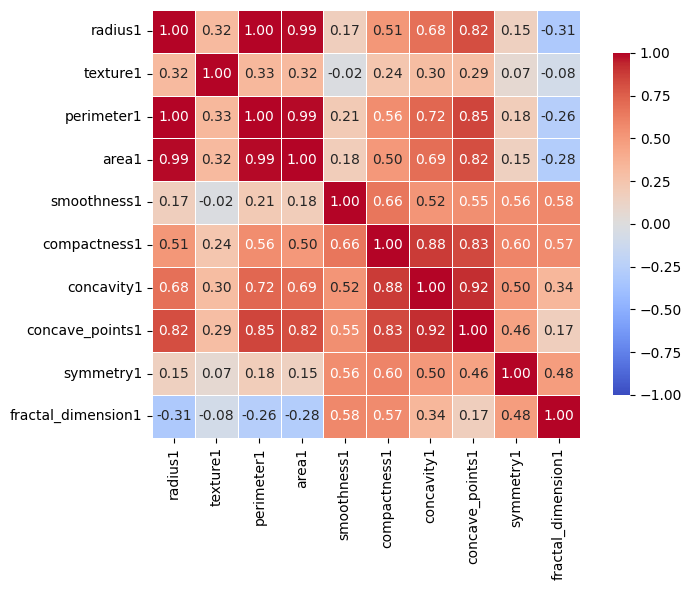

In [70]:
def heatmap(x):
    # Compute the correlation matrix and round the values
    corr = x.corr().round(2)

    # Set up the figure for the heatmap
    plt.figure(figsize=(8, 6))

    # Generate the heatmap using the 'coolwarm' colormap with specific min and max values
    sns.heatmap(corr, cmap='coolwarm', vmin=-1, vmax=1, center=0,
                annot=True, fmt='.2f', annot_kws={"fontsize": 10},
                square=True, linewidths=.5,
                cbar_kws={"shrink": .8},
                xticklabels=corr.columns, yticklabels=corr.columns)

    # Adjust the layout to ensure no clipping of labels
    plt.tight_layout()
    plt.show()

# Call the heatmap function with the dataset
heatmap(x)


The correlation matrix reveals strong positive relationships between several features, indicating that these characteristics tend to change together in breast tumors. Notably, radius, perimeter, and area are highly correlated, suggesting redundancy. Compactness, concavity, and concave points also show strong associations, potentially signifying their importance in tumor characterization. Texture appears less correlated with other features, suggesting it might be less informative for diagnosis.

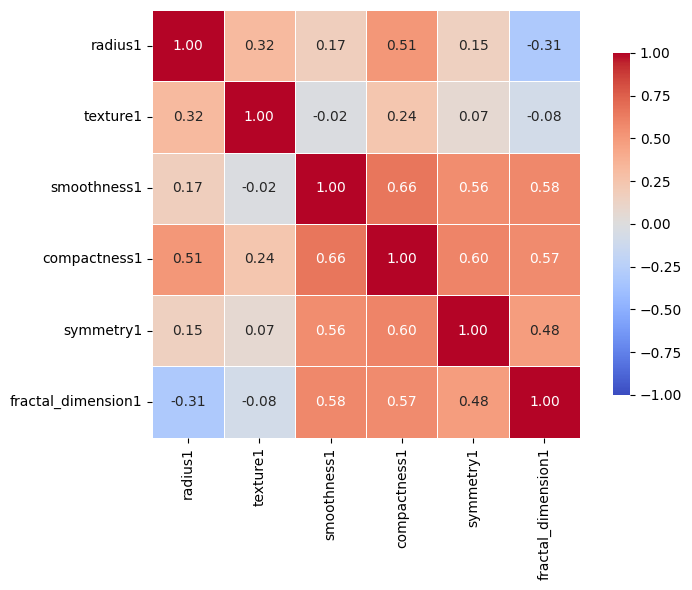

In [71]:
# Select the features of interest directly and call the heatmap function
features = ['radius1', 'texture1', 'smoothness1', 'compactness1', 'symmetry1', 'fractal_dimension1']
x_selected = x[features]

# Visualize the correlation matrix for the selected features
heatmap(x_selected)


**MODEL OPTIMIZATION**

**Data Segmentation**

In [83]:
# Create the training and testing datasets with a specified test size and random seed
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(
    x, y,
    test_size=0.3,
    random_state=7,
    stratify=y
)

**Logistic Regression**

In [84]:
# Initialize the StandardScaler and LogisticRegression components separately
scaler = StandardScaler()
log_reg = LogisticRegression()

# Create the pipeline
model = Pipeline([('scaler', scaler), ('model', log_reg)])

# Fit the pipeline to the training data
model.fit(x_train, y_train)

# Use the model to make predictions on the test data
y_pred = model.predict(x_test)


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


**Final Model Evaluation**

In [86]:
train_accuracy = model.score(x_train, y_train)
test_accuracy = model.score(x_test, y_test)

# Display the accuracies with rounding
print(f"Training Accuracy = {train_accuracy:.2f}")
print(f"Testing Accuracy = {test_accuracy:.2f}")

# Retrieve model coefficients and print them
coefficients = model.named_steps['model'].coef_[0]
for feature, coef in zip(x.columns, coefficients):
    print(f"{feature}: {coef:.2f}")

# Display the model intercept
intercept = model.named_steps['model'].intercept_
print(f"Intercept: {intercept}")


Training Accuracy = 0.95
Testing Accuracy = 0.93
radius1: 1.05
texture1: 1.26
perimeter1: 1.02
area1: 1.14
smoothness1: 0.89
compactness1: -0.35
concavity1: 1.14
concave_points1: 1.62
symmetry1: 0.36
fractal_dimension1: -0.45
Intercept: [-0.65653908]


The model achieved high accuracies on both the training and testing sets (0.95 and 0.93, respectively), indicating good performance. The listed coefficients represent the weights assigned to each feature (radius1, texture1, etc.) in the model. Positive coefficients suggest that an increase in that feature increases the likelihood of malignancy, while negative coefficients suggest the opposite. The intercept term is a constant value added to the final prediction.

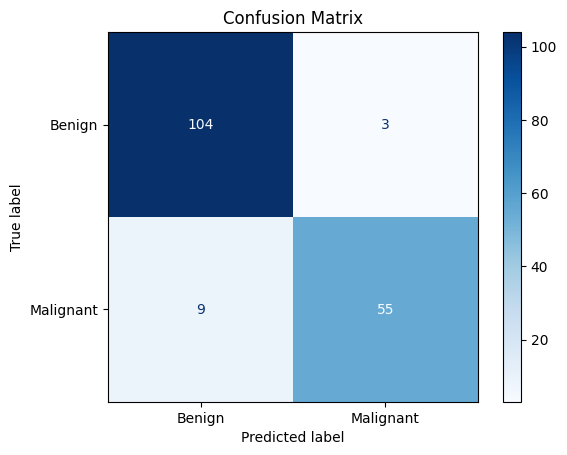

In [82]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Generate the confusion matrix
cfm = confusion_matrix(y_test, y_pred)

# Set up the confusion matrix display with custom labels
cm_display = ConfusionMatrixDisplay(cfm, display_labels=["Benign", "Malignant"])

# Plot the confusion matrix
cm_display.plot(cmap='Blues')
plt.title('Confusion Matrix')
plt.show()


The matrix shows that the model correctly predicted 104 benign cases (true negatives) and 55 malignant cases (true positives). However, it misclassified 3 benign cases as malignant (false positives) and 9 malignant cases as benign (false negatives). This analysis reveals that the model exhibits high accuracy overall, with a strong ability to correctly identify benign cases. However, there's room for improvement in correctly identifying malignant cases, suggesting potential areas for model refinement.

In [87]:
# Extracting the elements from the confusion matrix
TN, FP = cfm[0]
FN, TP = cfm[1]

# Calculate the evaluation metrics
precision = TP / (TP + FP)
recall = TP / (TP + FN)
far = FP / (FP + TN)
f1 = 2 * (precision * recall) / (precision + recall)

# Print the metrics
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"False Alarm Rate: {far:.2f}")
print(f"F1-score: {f1:.2f}")


Precision: 0.95
Recall: 0.86
False Alarm Rate: 0.03
F1-score: 0.90


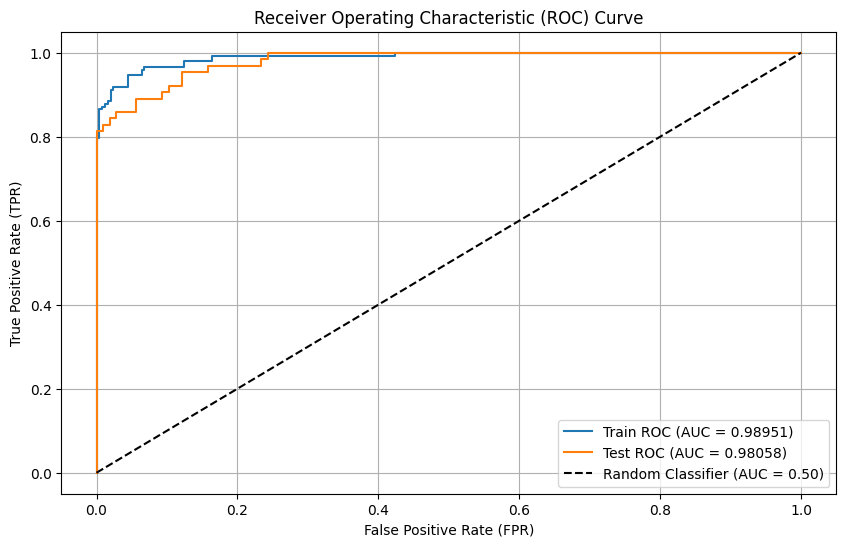

In [89]:
# Get predicted probabilities for training and testing
y_train_probs = model.predict_proba(x_train)[:, 1]
y_test_probs = model.predict_proba(x_test)[:, 1]

# Calculate ROC curve and AUC for training set
fpr_train, tpr_train, _ = roc_curve(y_train, y_train_probs)
auc_train = roc_auc_score(y_train, y_train_probs)

# Calculate ROC curve and AUC for testing set
fpr_test, tpr_test, _ = roc_curve(y_test, y_test_probs)
auc_test = roc_auc_score(y_test, y_test_probs)

# Plotting the ROC curves
plt.figure(figsize=(10, 6))

# Plot Train and Test ROC curves with new colors
plt.plot(fpr_train, tpr_train, color='#1f77b4', label=f'Train ROC (AUC = {auc_train:.5f})')  # Blue
plt.plot(fpr_test, tpr_test, color='#ff7f0e', label=f'Test ROC (AUC = {auc_test:.5f})')  # Orange

# Plot Random Classifier line with a different style
plt.plot([0, 1], [0, 1], 'k--', label='Random Classifier (AUC = 0.50)')

# Customize the plot
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.legend(loc='lower right')
plt.grid(True)

# Display the plot
plt.show()


## GUIDE QUESTIONS

## Guide Question 1
**What steps are required to remove the "Sample code number" column?**

To remove the "Sample code number" column from your dataset, you can typically use a method like drop() within your data analysis library (e.g., Pandas in Python). First, you would identify the column using a function like df.columns to get a list of all column names. Then, you would use the drop() function, specifying the column name ("Sample code number") and the axis (axis=1 for columns) to remove it from your DataFrame. Finally, you can verify the removal by checking the column names again to ensure the "Sample code number" column is no longer present.

## Guide Question 2
**How can the "Class" values be converted into binary (0 and 1) form in Python?**

The replace() method is used to substitute specific values within a Series or DataFrame. In this case, it maps 'M' to 1 and 'B' to 0, effectively converting the categorical labels into binary values. This is a common step in data preprocessing for machine learning tasks, as many algorithms require numerical input.


## Guide Question 3
**What is the importance of splitting the dataset into training and testing sets?**


Training Set: This portion of the data is used to train the model. The algorithm learns patterns and relationships within the training data to make predictions.
Testing Set: This portion of the data is kept separate from the training set and is used to evaluate how well the trained model generalizes to unseen data. By assessing the model's performance on data it has never encountered before, we can get a realistic estimate of its accuracy and identify potential overfitting (where the model performs well on the training data but poorly on new data).

This split allows for a more objective and reliable evaluation of the model's performance, helping to ensure that it can effectively make predictions on new, real-world data.

## Guide Question 4
**Why is it necessary to use the stratify parameter in the train_test_split function?**

When dealing with imbalanced datasets (like those with significantly more benign tumors than malignant ones in breast cancer), simply splitting the data randomly can lead to biased training and testing sets. This can result in a model that performs poorly on the minority class (malignant tumors) because it hasn't been exposed to enough examples during training. Using the stratify parameter in train_test_split is essential when dealing with imbalanced datasets like those involving breast cancer. It ensures that the model is trained and evaluated on data that is representative of the true class distribution, leading to more robust and reliable results.

## Guide Question 5
**What is logistic regression, and why is it suitable for this dataset?**

Logistic regression is a statistical method used for binary classification problems. It predicts the probability of an instance belonging to a particular class (in this case, malignant or benign tumor). he breast cancer dataset has a binary outcome: either malignant (1) or benign (0).In summary, logistic regression is a suitable choice for this dataset due to its binary nature, its ability to predict probabilities, its interpretability, and its relative simplicity.

## Guide Question 6
**How can the training and testing accuracy of the logistic regression model be calculated?**

After training the model on the training data, we can use it to make predictions on the same training data. The accuracy is calculated by comparing the model's predictions to the actual labels in the training set. The number of correct predictions divided by the total number of instances in the training set gives the training accuracy. Once the model is trained, it is evaluated on the unseen testing data. The model makes predictions on the testing data, and these predictions are compared to the actual labels. The number of correct predictions on the testing data divided by the total number of instances in the testing set gives the testing accuracy.

## Guide Question 7
**Which features in the dataset are most influential in determining the tumor status, and how can their importance be assessed?**

Features with High Positive Coefficients:

1. **radius1**: 1.05
2. **texture1**: 1.26
3. **perimeter1**: 1.02
4. **area1**: 1.14
5. **concavity1**: 1.14
6. **concave_points1**: 1.62

These features, particularly concave_points1, seem to have a strong positive influence on the prediction of malignancy. This aligns with medical knowledge, as these features are often associated with irregular tumor shapes and increased malignancy risk.

## Guide Question 8
**How is a confusion matrix generated, and what does it represent?**

A confusion matrix is generated by comparing a model's predictions to the actual ground truth labels in a classification task. For each instance in the dataset, the model predicts a class, and this prediction is compared to the actual class. The results are then tabulated in a matrix, where the rows represent the actual classes and the columns represent the predicted classes. This matrix provides a detailed breakdown of the model's performance, showing how many instances were correctly classified (true positives and true negatives) and how many were misclassified (false positives and false negatives).

## Guide Question 9
**How are precision, recall, F1-score, and false alarm rate calculated from the confusion matrix?**

Here's how to calculate precision, recall, F1-score, and false alarm rate,

$$ precision = \frac{TP}{TP+FP} $$
$$ recall = \frac{TP}{TP+FN} $$
$$ F1 = \frac{1}{\frac{1}{TP}+\frac{1}{FP}} $$
$$ FAR = \frac{FP}{FP+TN} $$

## Guide Question 10
**Why are these metrics important for evaluating the performance of a classifier?**

Precision: High precision indicates that when the model predicts a malignant tumor, it is likely to be correct.

Recall: High recall indicates that the model is good at identifying most of the actual malignant cases.

F1-score: Provides a balanced measure of both precision and recall.

False Alarm Rate: A low false alarm rate means the model is less likely to incorrectly classify benign tumors as malignant.

## Guide Question 11
**What is an ROC curve, and how is it plotted for a logistic regression model?**

An ROC (Receiver Operating Characteristic) curve is a graphical plot that illustrates the diagnostic ability of a binary classification 1  model at all classification thresholds. For a logistic regression model, the probability output can be considered a threshold. By varying this threshold, we can obtain different combinations of true positive rates (sensitivity) and false positive rates (1 - specificity). Plotting these combinations on a graph with sensitivity on the y-axis and 1-specificity on the x-axis creates the ROC curve. The area under the ROC curve (AUC) provides an overall measure of the model's performance, with a value of 1 indicating perfect classification and 0.5 indicating random guessing.

## Guide Question 12
**How is the AUC (Area Under the Curve) calculated, and what does it signify about the model's performance?**

The AUC (Area Under the Curve) is a single number that summarizes the performance of a classification model like logistic regression. It's calculated by measuring the area under the ROC curve, which plots the true positive rate (sensitivity) against the false positive rate (1-specificity) at various threshold settings. 1  An AUC of 1 indicates perfect classification, while 0.5 signifies random guessing. Higher AUC values generally indicate better model performance, as it demonstrates the model's ability to distinguish between the two classes more effectively.

## Guide Question 13
**How do the training and testing ROC curves compare, and what insights can be derived from this comparison?**

If the training and testing ROC curves are very close to each other, it suggests that the model generalizes well to unseen data. This indicates that the model is not overfitting to the training data and is likely to perform well on new, real-world examples.If the training ROC curve is significantly higher and to the left of the testing ROC curve, it suggests overfitting. The model has learned the training data too well and is not able to generalize effectively to new, unseen data. If both curves are close to the diagonal (random guessing), it suggests underfitting. The model has not learned the underlying patterns in the data well enough.

## Guide Question 14
**What challenges did you encounter during the preprocessing or model training phases, and how did you address them?**

 Breast cancer datasets often exhibit class imbalance, with a higher proportion of benign cases compared to malignant ones. This imbalance can bias the model towards the majority class and lead to poor performance on the minority class (malignant tumors).Techniques like oversampling the minority class, undersampling the majority class, or using cost-sensitive learning algorithms can help address class imbalance.

 ## Guide Question 15
 **If the model's performance is not satisfactory, what adjustments could be made to improve it?**

I will explore in creating new features from existing ones. For example, I could create a feature that calculates the ratio of radius to area, which might provide additional insights into tumor characteristics.Identify and remove irrelevant or redundant features Techniques like feature importance scores (from the model itself) or correlation analysis can help identify less informative features.
